In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/webmd.csv',na_values=' ')

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


**Unique values**

In [ ]:
data.nunique()

Age                  11
Condition          1805
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250166
Satisfaction          7
Sex                   2
Sides              1650
UsefulCount         148
dtype: int64

In [ ]:
data['Effectiveness'].nunique()

7

In [ ]:
data['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [ ]:
data.shape

(362806, 12)

In [ ]:
data1=data.drop(['Sides'],axis=1)

In [ ]:
data1.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,1


In [ ]:
data1.shape

(362806, 11)

****

# Creating a column for side effect based on effectiveness

In [ ]:
data1["sideeffect"]=0

for i in range(len(data1)):
    if data1["Effectiveness"][i]==5:
        data1["sideeffect"][i]='No Side Effects'
    elif data1["Effectiveness"][i]==4:
        data1["sideeffect"][i]='Mild Side Effects' 
    elif data1["Effectiveness"][i]==3:
        data1["sideeffect"][i]='Moderate Side Effects'
    elif data1["Effectiveness"][i]==2:
        data1["sideeffect"][i]='Severe Side Effects'
    else:
        data1["sideeffect"][i]='Extremely Severe Side Effects'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-p

In [ ]:
data1.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,sideeffect
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,0,No Side Effects
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,1,No Side Effects
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,0,Moderate Side Effects
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,0,Severe Side Effects
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,1,Extremely Severe Side Effects


In [ ]:
data1.to_csv('minu.csv',index=False)

In [ ]:
df=pd.read_csv('minu.csv')

In [ ]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,sideeffect
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,0,No Side Effects
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,1,No Side Effects
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,0,Moderate Side Effects
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,0,Severe Side Effects
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,1,Extremely Severe Side Effects


In [ ]:
df.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,sideeffect
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,2,No Side Effects
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,16,Moderate Side Effects
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,3,Mild Side Effects
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,1,No Side Effects
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,3,No Side Effects


In [ ]:
df.shape

(362806, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            350604 non-null  object
 1   Condition      362763 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        320945 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            336269 non-null  object
 10  UsefulCount    362806 non-null  int64 
 11  sideeffect     362806 non-null  object
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [ ]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [ ]:
df.nunique()

Age                  11
Condition          1805
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250166
Satisfaction          7
Sex                   2
UsefulCount         148
sideeffect            5
dtype: int64

# Checking for missing values

In [ ]:
df.isna().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41861
Satisfaction         0
Sex              26537
UsefulCount          0
sideeffect           0
dtype: int64

In [ ]:
df=df.drop(['Date','Reviews'],axis=1)

In [ ]:
df['Age'].nunique()

11

In [ ]:
df['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [ ]:
df.columns

Index(['Age', 'Condition', 'Drug', 'DrugId', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'Sex', 'UsefulCount', 'sideeffect'],
      dtype='object')

In [ ]:
df.dtypes

Age              object
Condition        object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex              object
UsefulCount       int64
sideeffect       object
dtype: object

# Filling Missing Values

In [ ]:
df['Age'] = df['Age'].fillna( df['Age'].dropna().mode().values[0] )

In [ ]:
df['Sex'] = df['Sex'].fillna( df['Sex'].dropna().mode().values[0] )

In [ ]:
df['Condition'] = df['Condition'].fillna( df['Condition'].dropna().mode().values[0] )

In [ ]:
df.isna().sum()

Age              0
Condition        0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
UsefulCount      0
sideeffect       0
dtype: int64

# EDA Analysis

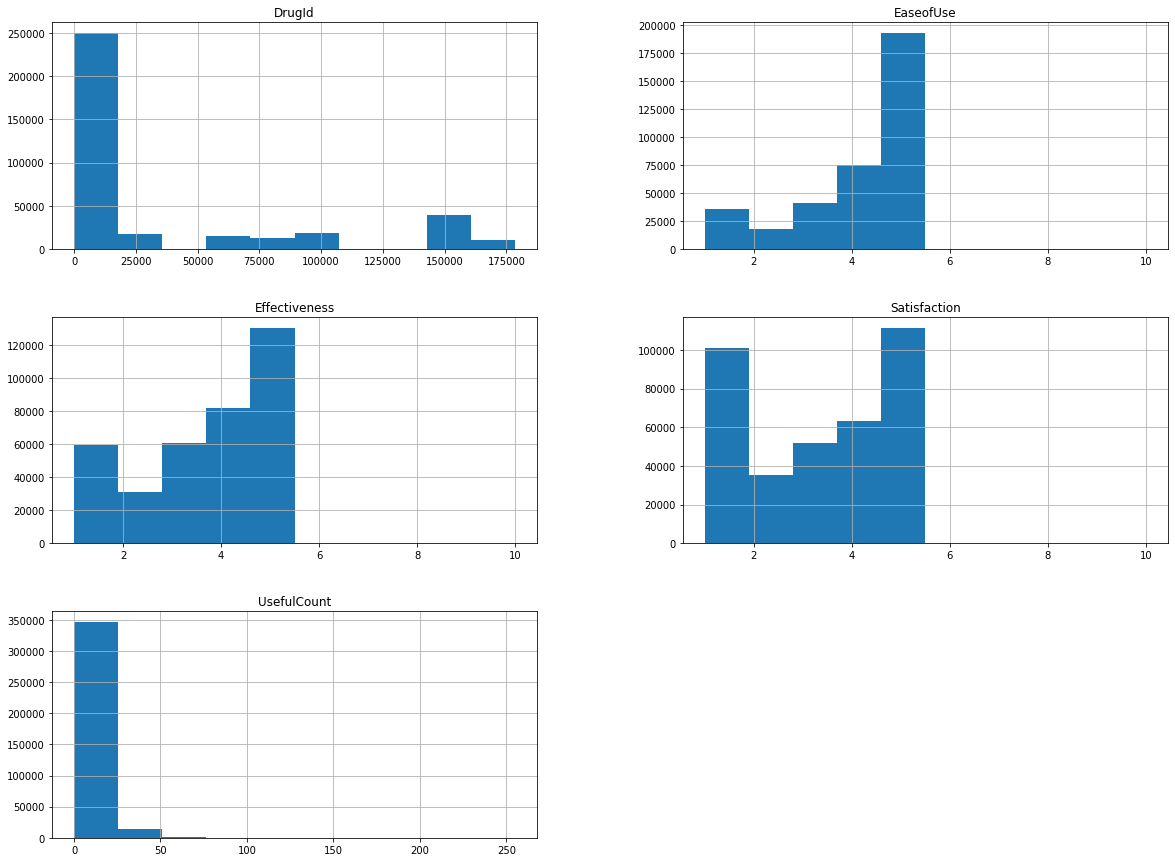

In [ ]:
fregraph=df.select_dtypes(include=['int64'])
fregraph.hist(figsize=(20,15))
plt.show()

In [ ]:
df_Sex_Drug = df.groupby(["Effectiveness", "Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Effectiveness,Sex,Count
0,1,Female,45397
1,1,Male,13990
2,2,Female,22193
3,2,Male,8608
4,3,Female,43185
5,3,Male,17221
6,4,Female,57493
7,4,Male,24328
8,5,Female,96492
9,5,Male,33896


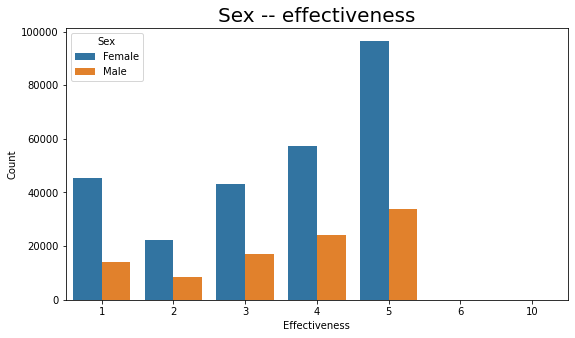

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x ="Effectiveness", y = "Count", hue = "Sex", data = df_Sex_Drug)
plt.title("Sex -- effectiveness",fontsize = 20)
plt.show()

In [ ]:
df_side_Drug = df.groupby(["sideeffect", "Sex"]).size().reset_index(name = "Count")
df_side_Drug

,sideeffect,Sex,Count
0,Extremely Severe Side Effects,Female,45400
1,Extremely Severe Side Effects,Male,13990
2,Mild Side Effects,Female,57493
3,Mild Side Effects,Male,24328
4,Moderate Side Effects,Female,43185
5,Moderate Side Effects,Male,17221
6,No Side Effects,Female,96492
7,No Side Effects,Male,33896
8,Severe Side Effects,Female,22193
9,Severe Side Effects,Male,8608


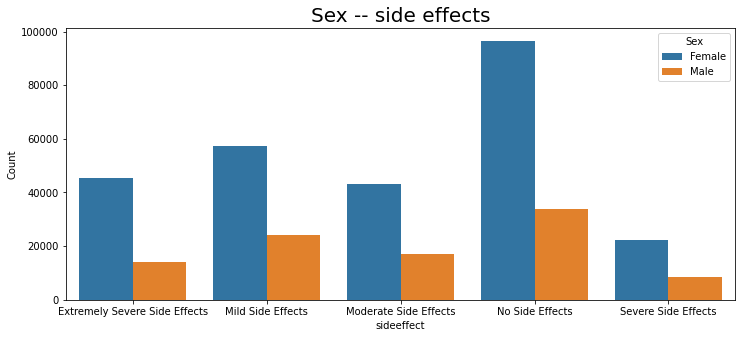

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x ="sideeffect", y = "Count", hue = "Sex", data = df_side_Drug)
plt.title("Sex -- side effects",fontsize = 20)
plt.show()

In [ ]:
df_drug_condition = df.groupby(["Drug", "Condition"]).size().reset_index(name = "Count")
df_drug_condition[:10]

,Drug,Condition,Count
0,12 hour decongestant,Runny Nose,27
1,"12 hour nasal relief spray, non-aerosol",Stuffy Nose,27
2,15dm-100gfn-5peh,Cold Symptoms,27
3,20dm-4cpm,Cough,27
4,25dph-7.5peh,Cold Symptoms,27
5,25dph-7.5peh,Stuffy Nose,27
6,"4 way spray, non-aerosol",Runny Nose,27
7,40pse-400gfn-20dm,Cough,27
8,40pse-400gfn-20dm,Inflammation of the Nose,27
9,40pse-400gfn-20dm,Other,27


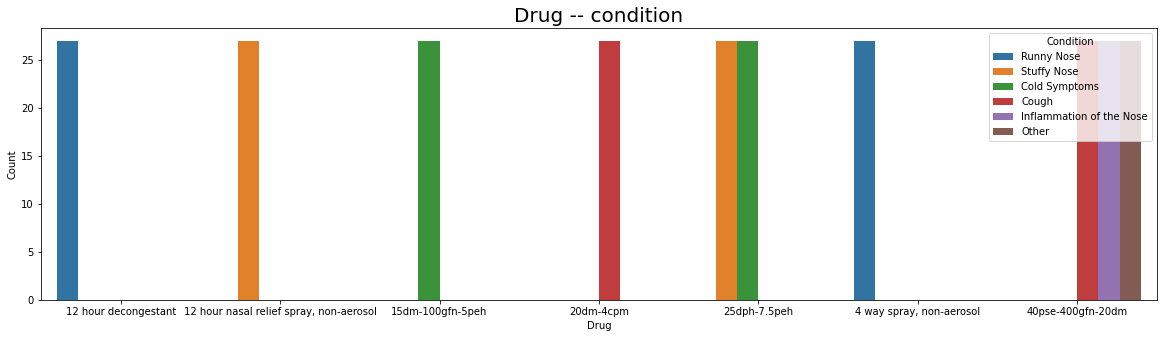

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x ="Drug", y = "Count", hue = "Condition", data = df_drug_condition[:10])
plt.title("Drug -- condition",fontsize = 20)
plt.show()

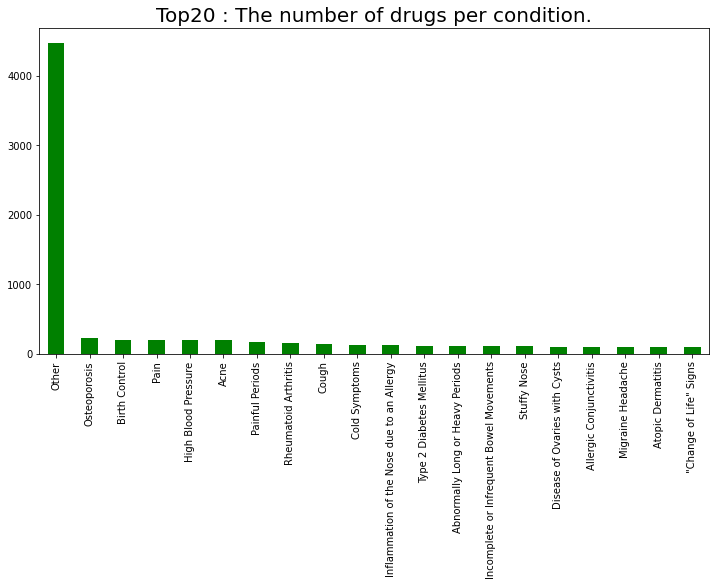

In [ ]:
condition_dn = df.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (12,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)
plt.show()

In [ ]:
df.columns

Index(['Age', 'Condition', 'Drug', 'DrugId', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'Sex', 'UsefulCount', 'sideeffect'],
      dtype='object')

Text(0.5, 1.0, 'Count of Ease of Use values')

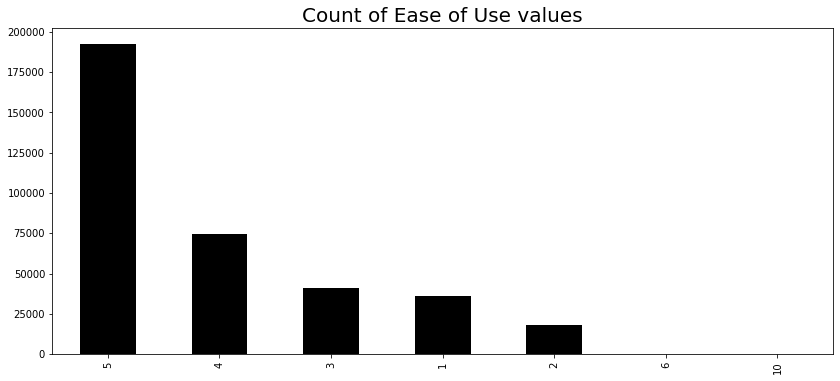

In [ ]:
Ease = df['EaseofUse'].value_counts().sort_values(ascending=False)
Ease.plot(kind="bar", figsize = (14,6), fontsize = 10,color="black")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of Ease of Use values", fontsize = 20)

In [ ]:
df_eff_Drug = df.groupby(["Drug", "Effectiveness"]).size().reset_index(name = "Count")
df_eff_Drug

,Drug,Effectiveness,Count
0,12 hour decongestant,4,27
1,"12 hour nasal relief spray, non-aerosol",2,27
2,15dm-100gfn-5peh,5,27
3,20dm-4cpm,1,27
4,25dph-7.5peh,5,54
...,...,...,...
19989,zzzquil,1,46
19990,zzzquil,2,9
19991,zzzquil,3,11
19992,zzzquil,4,24


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


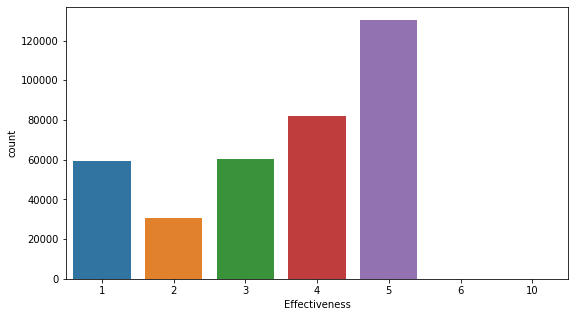

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.Effectiveness)
plt.show()

In [ ]:
drug = df["Drug"].value_counts().sort_values(ascending=False)
drug[:10]

cymbalta                     4648
lisinopril solution          4269
lisinopril                   4269
lexapro                      4134
hydrocodone-acetaminophen    3944
effexor xr                   3486
lyrica                       3069
tramadol hcl er              2932
tramadol hcl                 2932
zoloft                       2662
Name: Drug, dtype: int64

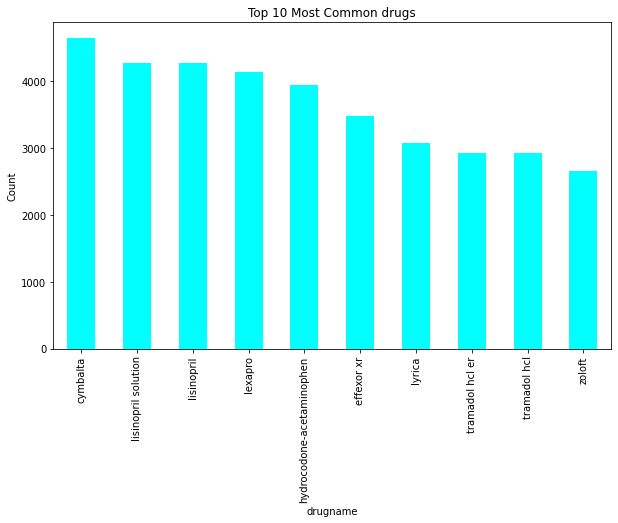

In [ ]:
drug[:10].plot(kind='bar', figsize = (10,6), fontsize = 10, color="cyan")
plt.title('Top 10 Most Common drugs')
plt.xlabel('drugname')
plt.ylabel('Count');

In [ ]:
df_Drug = df.groupby(["Drug", "Satisfaction"]).size().reset_index(name = "Count")
df_Drug

,Drug,Satisfaction,Count
0,12 hour decongestant,4,27
1,"12 hour nasal relief spray, non-aerosol",2,27
2,15dm-100gfn-5peh,1,27
3,20dm-4cpm,1,27
4,25dph-7.5peh,5,54
...,...,...,...
20075,zzzquil,1,59
20076,zzzquil,2,8
20077,zzzquil,3,16
20078,zzzquil,4,19


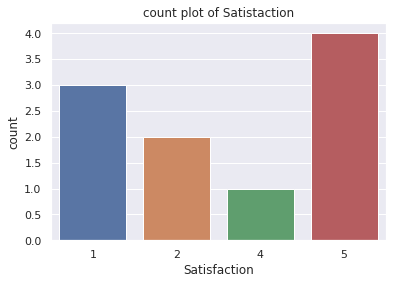

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Satisfaction',  data=df_Drug[:10])
plt.title('count plot of Satistaction')
plt.show()

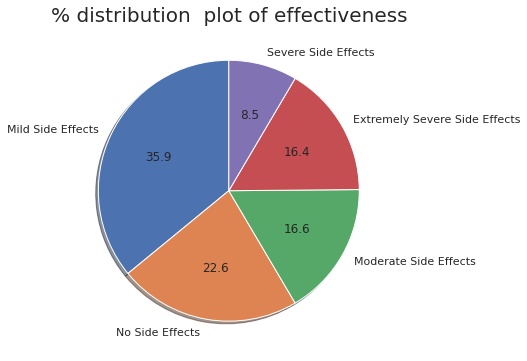

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(df['sideeffect'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Mild Side Effects', 'No Side Effects ','Moderate Side Effects','Extremely Severe Side Effects','Severe Side Effects'], shadow = True)
plt.title('% distribution  plot of effectiveness',fontsize = 20)
plt.show()

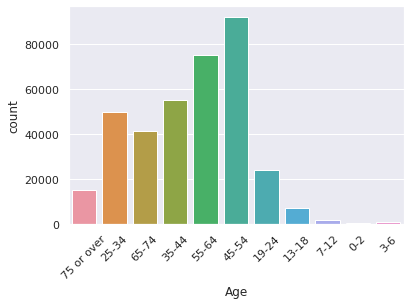

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Age',  data=df)
plt.xticks(rotation=45)
plt.show()

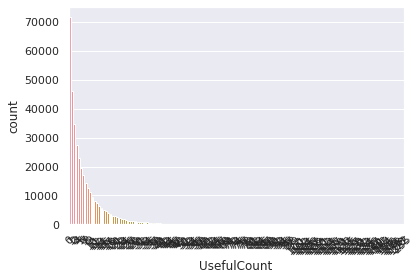

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='UsefulCount',  data=df)
plt.xticks(rotation=45)
plt.show()

**bold text**

# Checking outliers

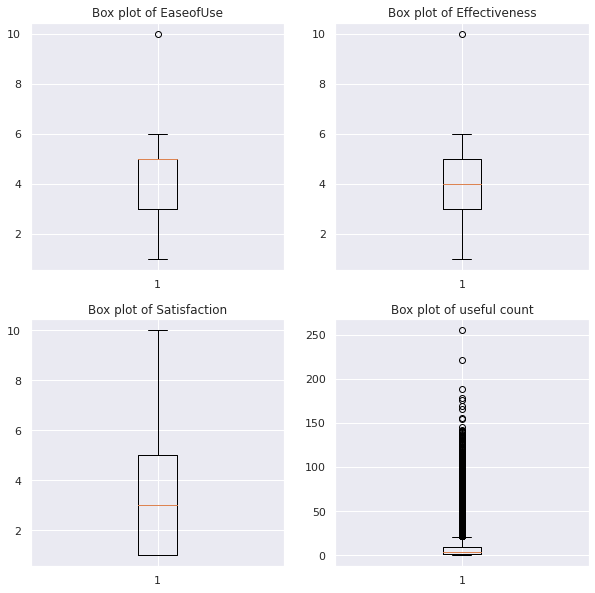

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.boxplot(df["EaseofUse"])
plt.title('Box plot of EaseofUse')

plt.subplot(2,2,2)
plt.boxplot(df["Effectiveness"])
plt.title('Box plot of Effectiveness')

plt.subplot(2,2,3)
plt.boxplot(df["Satisfaction"])
plt.title('Box plot of Satisfaction')

plt.subplot(2,2,4)
plt.boxplot(df["UsefulCount"])
plt.title('Box plot of useful count')

plt.show()


In [ ]:
Q1=np.percentile(df["UsefulCount"],25,interpolation="midpoint")
Q3=np.percentile(df["UsefulCount"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

In [ ]:
outlier=[]
for x in df['UsefulCount']:
    if((x>upper)or (x<low)):
        outlier.append(x )

In [ ]:
df.drop(df.loc[(df['UsefulCount']<low)|(df['UsefulCount']>upper)].index)

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,sideeffect
0,75 or over,Stuffy Nose,25dph-7.5peh,146724,5,5,5,Male,0,No Side Effects
1,25-34,Cold Symptoms,25dph-7.5peh,146724,5,5,5,Female,1,No Side Effects
2,65-74,Other,warfarin (bulk) 100 % powder,144731,2,3,3,Female,0,Moderate Side Effects
3,75 or over,Other,warfarin (bulk) 100 % powder,144731,2,2,1,Female,0,Severe Side Effects
4,35-44,Other,warfarin (bulk) 100 % powder,144731,1,1,1,Male,1,Extremely Severe Side Effects
...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,chantix,144470,5,5,5,Female,2,No Side Effects
362802,45-54,Other,chantix,144470,2,3,1,Female,16,Moderate Side Effects
362803,25-34,Stop Smoking,chantix,144470,2,4,2,Female,3,Mild Side Effects
362804,55-64,Stop Smoking,chantix,144470,5,5,5,Male,1,No Side Effects


{'boxes': [<matplotlib.lines.Line2D at 0x7fbeadd1b950>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbeadbf7850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbeadcd66d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbeadcd6650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbeadd1b510>,
  <matplotlib.lines.Line2D at 0x7fbeadbf7690>]}

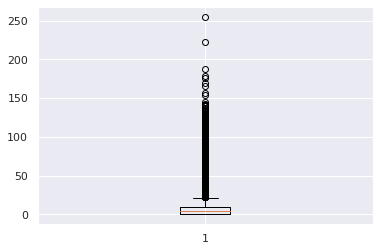

In [ ]:
plt.boxplot(df["UsefulCount"])

# Correlation matrix

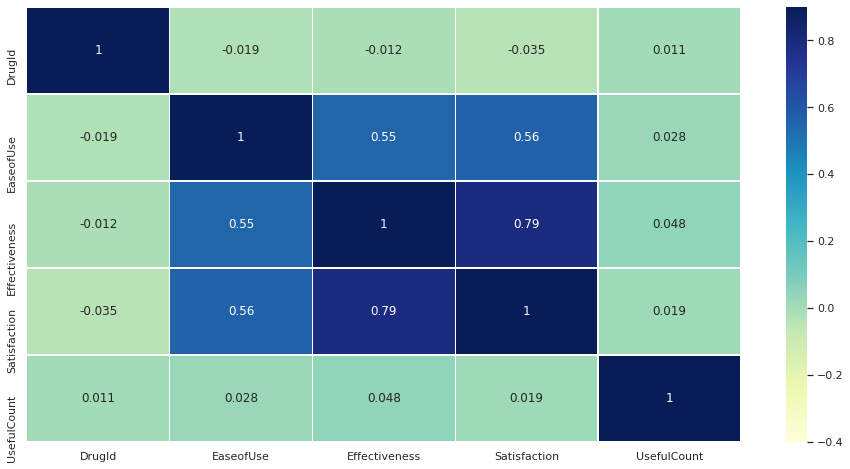

In [ ]:
corrmatrix = df.corr()
plt.subplots(figsize=(16,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [ ]:
df=df.drop(['DrugId','Satisfaction','UsefulCount'],axis=1)

In [ ]:
df.columns

Index(['Age', 'Condition', 'Drug', 'EaseofUse', 'Effectiveness', 'Sex',
       'sideeffect'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['Age','Condition','Sex','Drug']:
    df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Sex,sideeffect
0,10,1595,4,5,5,1,No Side Effects
1,3,423,4,5,5,0,No Side Effects
2,8,1183,6866,2,3,0,Moderate Side Effects
3,10,1183,6866,2,2,0,Severe Side Effects
4,5,1183,6866,1,1,1,Extremely Severe Side Effects


# Splitting of dataset

In [ ]:
x=df.drop(['sideeffect'],axis=1)
y=df['sideeffect']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

# Classification Models

**Decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_prediction=dt_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Confusion_matrix is :
 [[17933     0     0     0     0]
 [    0 24355     0     0     0]
 [    0     0 18064     0     0]
 [    0     0     0 39248     0]
 [    0     0     0     0  9242]]
Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       1.00      1.00      1.00     17933
            Mild Side Effects       1.00      1.00      1.00     24355
        Moderate Side Effects       1.00      1.00      1.00     18064
              No Side Effects       1.00      1.00      1.00     39248
          Severe Side Effects       1.00      1.00      1.00      9242

                     accuracy                           1.00    108842
                    macro avg       1.00      1.00      1.00    108842
                 weighted avg       1.00      1.00      1.00    108842



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_prediction=logit_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.71      0.75      0.73     17933
            Mild Side Effects       0.34      0.36      0.35     24355
        Moderate Side Effects       0.41      0.28      0.33     18064
              No Side Effects       0.67      0.86      0.75     39248
          Severe Side Effects       0.28      0.03      0.05      9242

                     accuracy                           0.56    108842
                    macro avg       0.48      0.46      0.44    108842
                 weighted avg       0.53      0.56      0.53    108842



In [ ]:
# from sklearn.svm import SVC
# svm_linear=SVC(kernel='linear')
# svm_linear.fit(x_train,y_train)
# y_prediction=svm_linear.predict(x_test)

In [ ]:
# print('Classification report :\n' ,classification_report(y_test,y_prediction))

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,max_depth=3)
rf.fit(x_train, y_train)
y_prediction=rf.predict(x_test)

In [ ]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.87      0.76      0.81     17933
            Mild Side Effects       1.00      1.00      1.00     24355
        Moderate Side Effects       0.58      0.94      0.72     18064
              No Side Effects       1.00      1.00      1.00     39248
          Severe Side Effects       0.00      0.00      0.00      9242

                     accuracy                           0.87    108842
                    macro avg       0.69      0.74      0.71    108842
                 weighted avg       0.82      0.87      0.84    108842



In [ ]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))

Confusion_matrix is :
 [[13691     2  4238     2     0]
 [    0 24355     0     0     0]
 [ 1017     0 17047     0     0]
 [    0     0     0 39248     0]
 [ 1015     6  8221     0     0]]


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=58,random_state=100,min_samples_split=0.07)
gb.fit(x_train,y_train)
y_prediction=gb.predict(x_test)

In [ ]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       1.00      1.00      1.00     17933
            Mild Side Effects       1.00      1.00      1.00     24355
        Moderate Side Effects       1.00      1.00      1.00     18064
              No Side Effects       1.00      1.00      1.00     39248
          Severe Side Effects       1.00      1.00      1.00      9242

                     accuracy                           1.00    108842
                    macro avg       1.00      1.00      1.00    108842
                 weighted avg       1.00      1.00      1.00    108842



**Bernouli classifier**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bn=BernoulliNB()
bn.fit(x_train,y_train)
y_prediction=bn.predict(x_test)

In [ ]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00     17933
            Mild Side Effects       1.00      0.00      0.00     24355
        Moderate Side Effects       0.00      0.00      0.00     18064
              No Side Effects       0.36      1.00      0.53     39248
          Severe Side Effects       0.00      0.00      0.00      9242

                     accuracy                           0.36    108842
                    macro avg       0.27      0.20      0.11    108842
                 weighted avg       0.35      0.36      0.19    108842

